# Домашняя работа по дисциплине "Классическое машинное обучение" 

## Задача регрессии (self implementation) 

Работу выполнил студент Груданов Николай.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('asset-v1_SkillFactory+MIFIML-2sem+2025+type@asset+block@salary_data.csv')

In [7]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [8]:
class LinearRegression():
   """
   Класс для реализации линейной регрессии с градиентным спуском
   """
   
   def __init__(self, learning_rate, iterations):
       """
       Конструктор класса
       
       Parameters:
       learning_rate (float): Скорость обучения (размер шага)
       iterations (int): Количество итераций обучения
       """
       self.learning_rate = learning_rate
       self.iterations = iterations
       
   def fit(self, X, Y):
       """
       Метод обучения модели
       
       Parameters:
       X (array): Матрица признаков
       Y (array): Целевая переменная
       """
       # Инициализируем количество примеров и признаков
       self.m, self.n = X.shape
       
       # Инициализируем веса и смещение
       self.weights = np.zeros(self.n)
       self.bias = 0
       
       # Сохраняем входные данные для метода update_weights
       self.X = X
       self.Y = Y
       
       # Цикл обучения с градиентным спуском
       for i in range(self.iterations):
           self.update_weights()
       
       return self
   
   def update_weights(self):
       """
       Метод обновления весов с помощью градиентного спуска
       """
       # Делаем предсказания
       Y_pred = self.predict(self.X)
       
       # Вычисляем градиенты
       # Градиент по весам: dw = (1/m) * X.T * (Y_pred - Y)
       dw = (1 / self.m) * np.dot(self.X.T, (Y_pred - self.Y))
       
       # Градиент по смещению: db = (1/m) * sum(Y_pred - Y)
       db = (1 / self.m) * np.sum(Y_pred - self.Y)
       
       # Обновляем параметры модели
       self.weights = self.weights - self.learning_rate * dw
       self.bias = self.bias - self.learning_rate * db
       
       return self
   
   def predict(self, X):
       """
       Метод предсказания
       
       Parameters:
       X (array): Матрица признаков для предсказания
       
       Returns:
       array: Предсказанные значения
       """
       return np.dot(X, self.weights) + self.bias



In [9]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

model = LinearRegression(iterations=1000, learning_rate=0.01)
model.fit(X, Y)

Y_pred = model.predict(X)

# Вывод результатов
print(*np.round(model.weights, 2))
print(np.round(model.bias, 2))

9876.11
22920.49


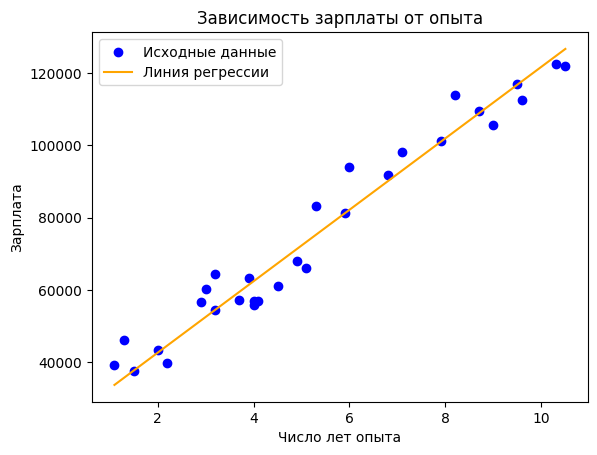

In [10]:
# Визуализация
plt.scatter(X, Y, color='blue', label='Исходные данные')
plt.plot(X, Y_pred, color='orange', label='Линия регрессии')
plt.title('Зависимость зарплаты от опыта')
plt.xlabel('Число лет опыта')
plt.ylabel('Зарплата')
plt.legend()
plt.show()